In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [119]:
data=pd.read_csv("car.csv")
data['mileage']=data['mileage'].astype(int)
data.head()

,price,year,mileage,color,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,...,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552,silver,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590,silver,2,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146,blue,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654,red,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561,white,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [120]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

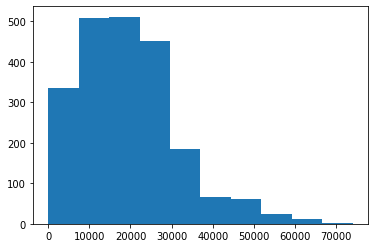

In [121]:
plt.hist(data['price']);

In [122]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [123]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)


In [127]:
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)
Linreg.score(X_test,y_test)

0.32728963265194055

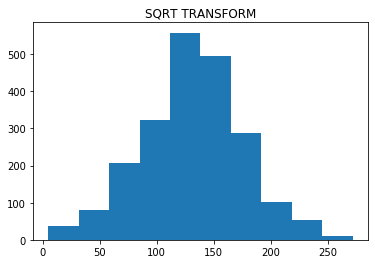

In [128]:
#sqrt transformation
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()

In [129]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),np.sqrt(data['price']),test_size = 0.2,random_state = 1)


In [130]:
Linreg1 = LinearRegression()
Linreg1.fit(X_train,y_train)
Linreg1.score(X_test,y_test)#accuracy score increased with more than 10% after using sqrt transformation 


0.4572636050183765

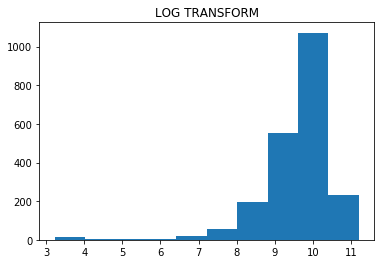

In [52]:
#log transformation
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()
#log transformation did'nt normalize data instead it get negatively skewed from positively skewed
#so I will not use this transformation.

In [53]:
from scipy import stats

(array([ 36.,  81., 206., 323., 558., 495., 287., 103.,  54.,  10.]),
 array([  8.        ,  61.40588203, 114.81176407, 168.2176461 ,
        221.62352814, 275.02941017, 328.43529221, 381.84117424,
        435.24705628, 488.65293831, 542.05882035]),
 <a list of 10 Patch objects>)

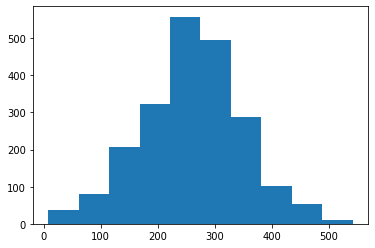

In [132]:
plt.hist(stats.boxcox(data['price'],lmbda=0.5))#with lmbda value 0.5 this transformation worked as sqrt transformation
#include lmbda values point

In [66]:
from sklearn.model_selection import train_test_split as tts

In [107]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),stats.boxcox(data['price'],lmbda=0.5),test_size = 0.2,random_state = 1)


In [108]:
Linreg2 = LinearRegression()
Linreg2.fit(X_train,y_train)
Linreg2.score(X_test,y_test)#accuracy we get is same as we get in case of sqrt transformation

0.45726360501837615